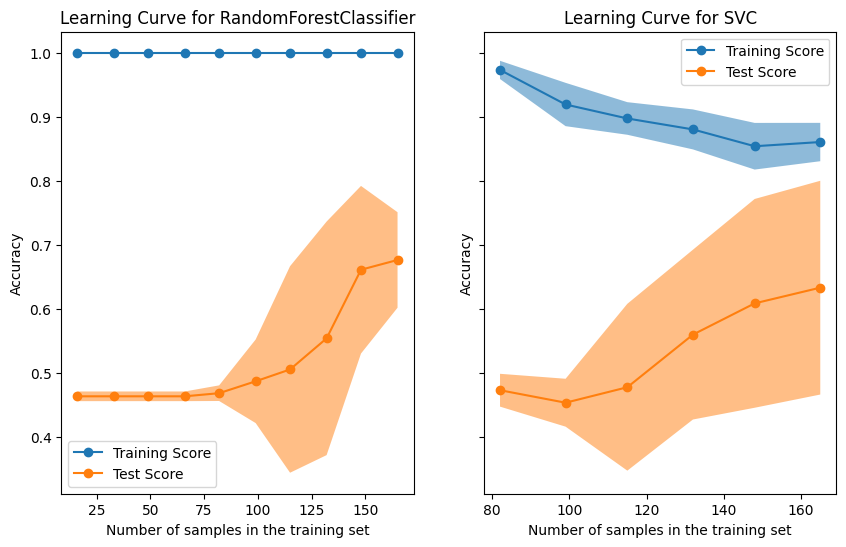

In [9]:
import warnings
warnings.filterwarnings('ignore')
# Preparing Data
import pandas as pd
# Load the rock mines dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url)
column_names = ["sensor_" + str(i) for i in range(1, 61)] + ["target"]
df.columns = column_names
df = df.reset_index()
df = df.rename(columns={"index": "id"})
df['target'] = df['target'].map({'M': 1, 'R': 0})
x_data = df.iloc[:, :60]
x_data = x_data.drop('id', axis=1)
y_data = df['target']

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
rf = RandomForestClassifier()
svc = SVC(kernel="linear")


#Learning Curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, StratifiedKFold
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
common_params = {
    "X": x_data,
    "y": y_data,
    "train_sizes":  np.linspace(0.1, 1.0, num=10),
    "cv": StratifiedKFold(n_splits=5),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "scoring": "accuracy",
    "score_name": "Accuracy",
}
for ax_idx, estimator in enumerate([rf, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")




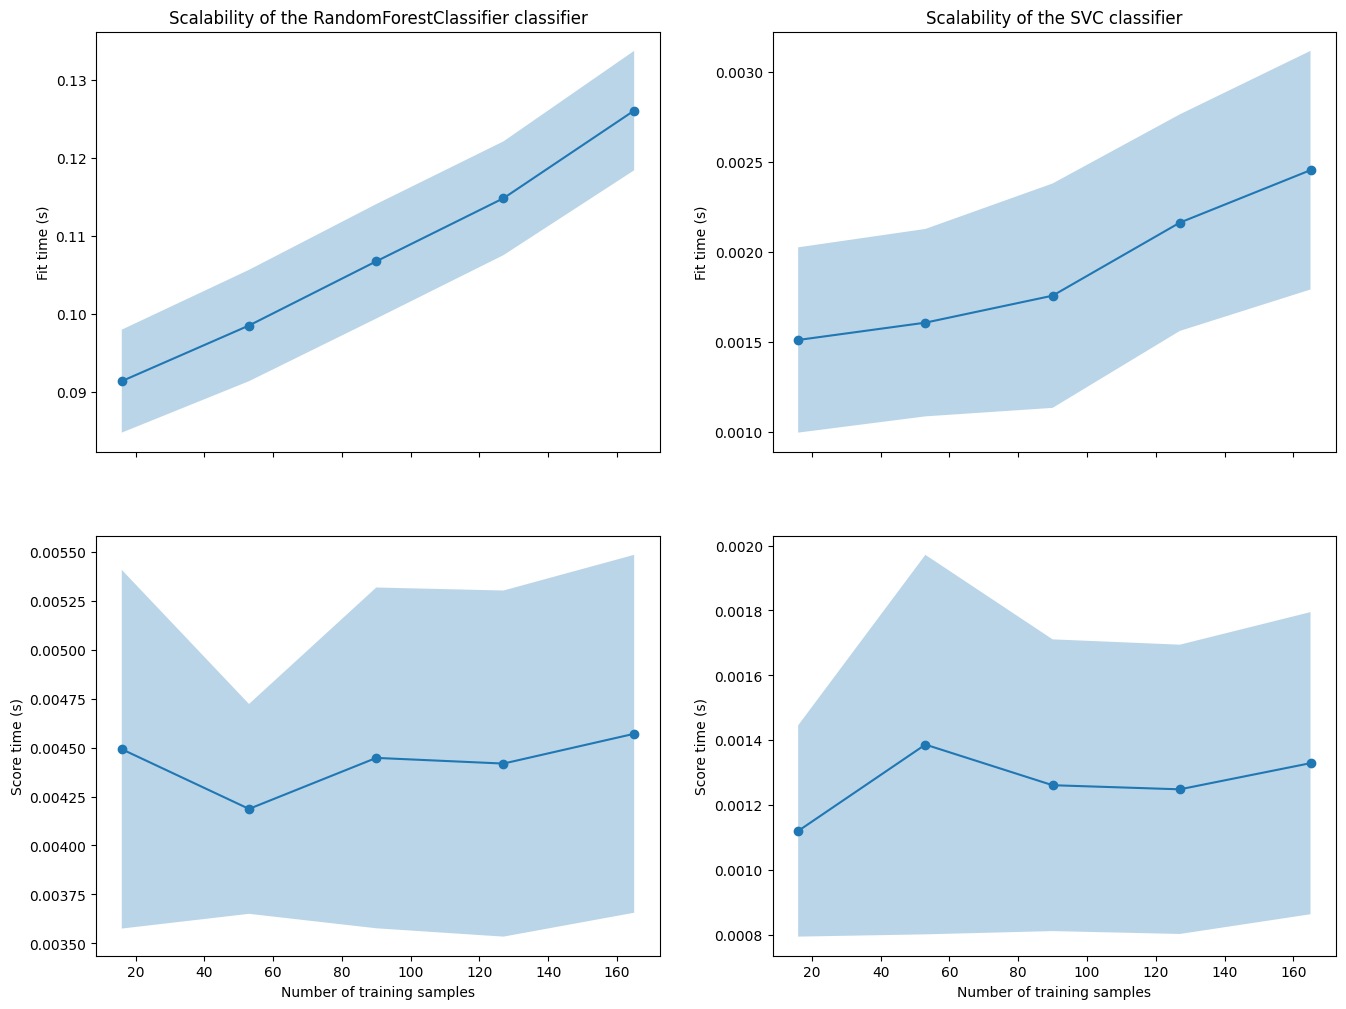

In [4]:

#Fit Time Analysis
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
common_params = {
    "X": x_data,
    "y": y_data,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}
train_sizes, _, test_scores_rf, fit_times_rf, score_times_rf = learning_curve(
    rf, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    svc, **common_params
)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)
for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_rf, fit_times_svm],
        [score_times_rf, score_times_svm],
        [rf, svc],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )
    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")
